# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [2]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the given labels
breed = pd.read_csv('../data/breed_labels.csv')
color = pd.read_csv('../data/color_labels.csv')
state = pd.read_csv('../data/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [15]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [4]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [4]:
original_df = pd.read_csv('../data/train.csv')

In [5]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [6]:
original_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


In [7]:
original_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [8]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    print(n)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

Load the data...

In [9]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")
y

10582


0        2.0
1        2.0
2        2.0
3        2.0
4        1.0
5        1.0
6        1.0
7        1.0
8        2.0
9        4.0
10       3.0
11       4.0
12       2.0
13       4.0
14       2.0
15       4.0
16       4.0
17       4.0
18       1.0
19       1.0
20       2.0
21       3.0
22       2.0
23       3.0
24       1.0
25       4.0
26       4.0
27       1.0
28       1.0
29       3.0
        ... 
10552    3.0
10553    4.0
10554    2.0
10555    2.0
10556    4.0
10557    4.0
10558    2.0
10559    2.0
10560    2.0
10561    1.0
10562    4.0
10563    2.0
10564    1.0
10565    4.0
10566    4.0
10567    3.0
10568    1.0
10569    2.0
10570    2.0
10571    4.0
10572    3.0
10573    4.0
10574    4.0
10575    4.0
10576    3.0
10577    2.0
10578    4.0
10579    2.0
10580    4.0
10581    3.0
Name: AdoptionSpeed, Length: 10582, dtype: float64

Create the model and evaluate it

In [10]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it couldn be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.tree import DecisionTreeClassifier as DT
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
              'min_samples_split':(2, 3, 5, 10, 50, 100)}
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.3519622095560508
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


**And finally**, we predict the unknown label for the testing set

In [22]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [12]:
yy = results.clf.iloc[0].predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

In [39]:
yy

array([2, 1, 2, ..., 2, 4, 4])

The last thing we do is generating a file that should be *submitted* on kaggle

In [13]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [14]:
submission.to_csv("../data/submission.csv", header=True, index=False)

Linear regression

In [33]:
# Split the data into training/testing sets
X_train = X[:-750]["Age"].values.reshape(-1,1)
X_test = X[-750:]["Age"].values.reshape(-1,1)

# Split the targets into training/testing sets
y_train = y[:-750].values.reshape(-1,1)
y_test = y[-750:].values.reshape(-1,1)

In [35]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()

In [31]:
X_train.values.reshape(-1,1)

array([[3],
       [4],
       [1],
       ...,
       [2],
       [7],
       [3]], dtype=int64)

In [32]:
y_test.values.reshape(-1,1)

array([[4.],
       [4.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [2.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [4.],
       [1.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [4.],
       [2.],
       [2.],
       [4.],
       [4.],
       [3.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [2.],
       [4.],
       [2.],
       [1.],
       [4.],
       [2.],
       [2.],
       [4.],
       [3.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [4.],
       [2.],
       [4.],
       [2.],
       [1.],
       [4.],
       [3.],
       [1.],
       [0.],
       [3.],
       [1.],
       [4.],
       [4.],
       [1.],
       [4.],
       [1.],

In [1]:
X_train

NameError: name 'X_train' is not defined

In [36]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
y_valid.shape

(3175,)

In [39]:
y_pred = regr.predict(X_test)
y_pred

array([[2.47187292],
       [2.47187292],
       [2.46019753],
       [2.46019753],
       [2.46603522],
       [2.46019753],
       [2.46603522],
       [2.46603522],
       [2.46603522],
       [2.73456934],
       [2.47771062],
       [2.47771062],
       [2.47771062],
       [2.5536007 ],
       [2.59446458],
       [2.47187292],
       [2.46019753],
       [2.46603522],
       [2.52441221],
       [2.47187292],
       [2.48354832],
       [2.47187292],
       [2.46603522],
       [2.51273681],
       [2.46603522],
       [2.46603522],
       [2.48354832],
       [2.47187292],
       [2.46603522],
       [2.47187292],
       [2.47771062],
       [2.46019753],
       [2.46603522],
       [2.47187292],
       [2.50689911],
       [2.59446458],
       [2.47771062],
       [2.47771062],
       [2.59446458],
       [2.57695149],
       [2.73456934],
       [2.46019753],
       [2.52441221],
       [2.48938602],
       [2.48938602],
       [2.46019753],
       [2.47187292],
       [2.460

Coefficients: 
 [[0.0058377]]
Mean squared error: 1.36
Variance score: 0.01


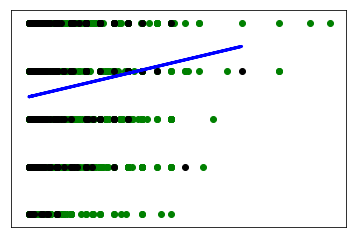

In [40]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

0         3
1         4
2         1
3         3
4        12
5         2
6         2
7         2
8         3
9        78
10        6
11        8
12        2
13        1
14       12
15        3
16        0
17       10
18        3
19        2
20        1
21       14
22        1
23        4
24        1
25       24
26       24
27        2
28       12
29       12
         ..
10532    36
10533     2
10534     2
10535    30
10536     2
10537     2
10538    48
10539    12
10540     4
10541     2
10542     4
10543     3
10544     1
10545    13
10546     4
10547     2
10548     3
10549     3
10550     1
10551     1
10552    11
10553     2
10554     3
10555     2
10556    12
10557     0
10558     6
10559    48
10560     1
10561     6
Name: Age, Length: 10562, dtype: int64

In [2]:
X[:-5].columns

NameError: name 'X' is not defined

Regresion polinomial

In [1]:
# Split the data into training/testing sets
X_train = X[:-162].drop(["PID"], axis=1)
X_test = X[-162:].drop(["PID"], axis=1)

# Split the targets into training/testing sets
y_train = y[:-162]
y_test = y[-162:]

NameError: name 'X' is not defined

In [43]:
y_train

0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
5       1.0
6       1.0
7       1.0
8       2.0
9       4.0
10      3.0
11      4.0
12      2.0
13      4.0
14      2.0
15      4.0
16      4.0
17      4.0
18      1.0
19      1.0
20      2.0
21      3.0
22      2.0
23      3.0
24      1.0
25      4.0
26      4.0
27      1.0
28      1.0
29      3.0
       ... 
5261    1.0
5262    1.0
5263    3.0
5264    4.0
5265    4.0
5266    4.0
5267    3.0
5268    1.0
5269    2.0
5270    1.0
5271    3.0
5272    4.0
5273    2.0
5274    1.0
5275    4.0
5276    1.0
5277    4.0
5278    4.0
5279    3.0
5280    1.0
5281    1.0
5282    4.0
5283    2.0
5284    2.0
5285    2.0
5286    2.0
5287    4.0
5288    2.0
5289    1.0
5290    2.0
Name: AdoptionSpeed, Length: 5291, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [21]:
polynomial_degree = 5 

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train)

X_poly_train = poly_features.transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_test)))

MemoryError: 

In [45]:
#plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

#X_range_start = np.min(np.r_[X_train, X_test])
#X_range_stop = np.max(np.r_[X_train, X_test])

#y_range_start = np.min(np.r_[y_train, y_test])
#y_range_stop = np.max(np.r_[y_train, y_test])

#X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
#X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
#plt.subplot(1, 2, 1)
#plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
#plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
#plt.ylim(y_range_start, y_range_stop)
#plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
#plt.subplot(1, 2, 2)
#plt.scatter(X_test, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
#plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
#plt.ylim(y_range_start, y_range_stop)
#plt.title("Conjunto de Validación")

#plt.show()

ValueError: X shape does not match training shape

<Figure size 1120x400 with 0 Axes>